In [4]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

mp_drawing=mp.solutions.drawing_utils
mp_drawing_styles=mp.solutions.drawing_styles
mp_holistic=mp.solutions.holistic

# for webcam input
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = holistic.process(image)
    print(results)
    break
    # # Draw landmark annotation on the image.
    # image.flags.writeable = True
    # image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    # mp_drawing.draw_landmarks(
    #     image,
    #     results.face_landmarks,
    #     mp_holistic.FACEMESH_CONTOURS,
    #     landmark_drawing_spec=None,
    #     connection_drawing_spec=mp_drawing_styles
    #     .get_default_face_mesh_contours_style())
    # mp_drawing.draw_landmarks(
    #     image,
    #     results.pose_landmarks,
    #     mp_holistic.POSE_CONNECTIONS,
    #     landmark_drawing_spec=mp_drawing_styles
    #     .get_default_pose_landmarks_style())
    # # Flip the image horizontally for a selfie-view display.
    # cv2.imshow('MediaPipe Holistic', cv2.flip(image, 1))
    # if cv2.waitKey(5) & 0xFF == 27:
    #   break
cap.release()

c:\Users\rishi\OneDrive\Desktop\Hackathon\.venv\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>


#Converting Mediapipe to Dataframe

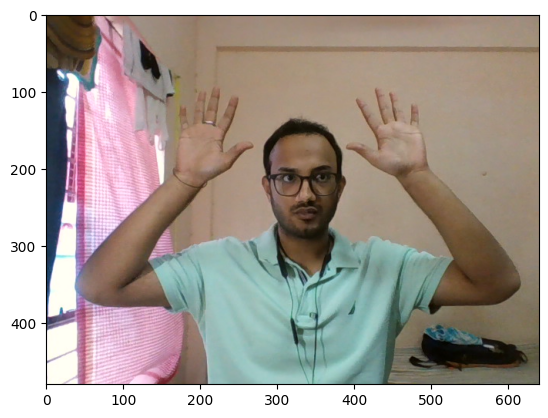

In [5]:
plt.imshow(image)

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

face=pd.DataFrame()
pose=pd.DataFrame()
left_hand=pd.DataFrame()
right_hand=pd.DataFrame()

if results.face_landmarks is not None:
    for i,point in enumerate(results.face_landmarks.landmark):
        face.loc[i,['x','y','z']]=[point.x,point.y,point.z]
if results.pose_landmarks is not None:
    for i,point in enumerate(results.pose_landmarks.landmark):
        pose.loc[i,['x','y','z']]=[point.x,point.y,point.z]
if results.left_hand_landmarks is not None:
    for i,point in enumerate(results.left_hand_landmarks.landmark):
        left_hand.loc[i,['x','y','z']]=[point.x,point.y,point.z]
if results.right_hand_landmarks is not None:
    for i,point in enumerate(results.right_hand_landmarks.landmark):
        right_hand.loc[i,['x','y','z']]=[point.x,point.y,point.z]
# face['y']=-face['y']

<Axes: xlabel='x', ylabel='y'>

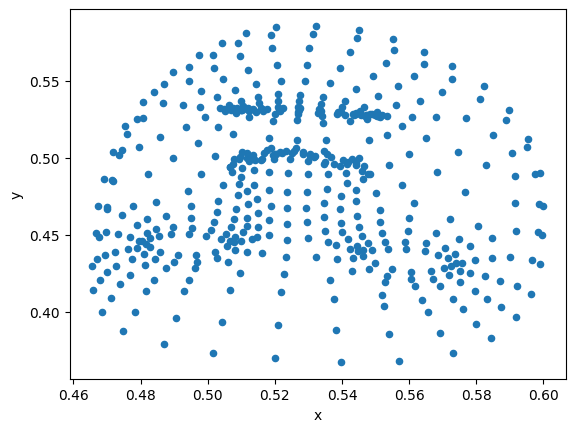

In [14]:
face.plot(x='x',y='y',kind='scatter')

In [21]:
face

,x,y,z
0,0.526674,0.524784,-0.015818
1,0.524526,0.499239,-0.031459
2,0.526361,0.506189,-0.016044
3,0.518761,0.468943,-0.023386
4,0.523887,0.490306,-0.033679
...,...,...,...
463,0.54238,0.440689,0.001817
464,0.538259,0.443623,-0.001399
465,0.535782,0.445699,-0.005346
466,0.57239,0.430139,0.002527


In [31]:
def create_frame_landmark_df(results,frame):
    xyz_skel=xyz[['type','landmark_index']].drop_duplicates().reset_index(drop=True).copy()

    face=pd.DataFrame()
    pose=pd.DataFrame()
    left_hand=pd.DataFrame()
    right_hand=pd.DataFrame()

    if results.face_landmarks is not None:
        for i,point in enumerate(results.face_landmarks.landmark):
            face.loc[i,['x','y','z']]=[point.x,point.y,point.z]
    if results.pose_landmarks is not None:
        for i,point in enumerate(results.pose_landmarks.landmark):
            pose.loc[i,['x','y','z']]=[point.x,point.y,point.z]
    if results.left_hand_landmarks is not None:
        for i,point in enumerate(results.left_hand_landmarks.landmark):
            left_hand.loc[i,['x','y','z']]=[point.x,point.y,point.z]
    if results.right_hand_landmarks is not None:
        for i,point in enumerate(results.right_hand_landmarks.landmark):
            right_hand.loc[i,['x','y','z']]=[point.x,point.y,point.z]
            
    face=face.reset_index().rename(columns={'index':'landmark_index'}).assign(type='face')
    pose=pose.reset_index().rename(columns={'index':'landmark_index'}).assign(type='pose')
    left_hand=left_hand.reset_index().rename(columns={'index':'landmark_index'}).assign(type='left_hand')
    right_hand=right_hand.reset_index().rename(columns={'index':'landmark_index'}).assign(type='right_hand')

    landmarks=pd.concat([face,pose,left_hand,right_hand]).reset_index(drop=True)
    landmarks=xyz_skel.merge(landmarks,on=['type','landmark_index'],how='left')
    landmarks=landmarks.assign(frame=frame)
    return landmarks

In [33]:
train['sign'].value_counts()

sign
listen    415
look      414
shhh      411
donkey    410
mouse     408
         ... 
dance     312
person    312
beside    310
vacuum    307
zipper    299
Name: count, Length: 250, dtype: int64

In [7]:
train=pd.read_csv('./input/asl-signs/train.csv')
pq_file='./input/asl-signs/train_landmark_files/16069/695046.parquet'
xyz=pd.read_parquet(pq_file)

In [12]:
xyz.query('frame == 105')['type'].value_counts()

type
face          468
pose           33
left_hand      21
right_hand     21
Name: count, dtype: int64

In [11]:
xyz

,frame,row_id,type,landmark_index,x,y,z
0,105,105-face-0,face,0,0.459484,0.450040,-0.048297
1,105,105-face-1,face,1,0.451732,0.401943,-0.066326
2,105,105-face-2,face,2,0.452219,0.418714,-0.042678
3,105,105-face-3,face,3,0.438481,0.372725,-0.040756
4,105,105-face-4,face,4,0.450793,0.390858,-0.067166
...,...,...,...,...,...,...,...
21715,144,144-right_hand-16,right_hand,16,NaN,NaN,NaN
21716,144,144-right_hand-17,right_hand,17,NaN,NaN,NaN
21717,144,144-right_hand-18,right_hand,18,NaN,NaN,NaN
21718,144,144-right_hand-19,right_hand,19,NaN,NaN,NaN


In [19]:
ROWS_PER_FRAME = 543  # number of landmarks per frame

def load_relevant_data_subset(pq_path):
    data_columns = ['x', 'y', 'z']
    data = pd.read_parquet(pq_path, columns=data_columns)
    n_frames = int(len(data) / ROWS_PER_FRAME)
    data = data.values.reshape(n_frames, ROWS_PER_FRAME, len(data_columns))
    return data.astype(np.float32)

In [21]:
xyz_np=load_relevant_data_subset(pq_file)